## CNN  en sepecifier une station

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras import layers , callbacks,optimizers,models
import matplotlib.pyplot as plt

traite time serise data 

In [ ]:

from sklearn.discriminant_analysis import StandardScaler


file_path = 'merged_all_bikes_weather_events.csv'
data = pd.read_csv(file_path)
data['minute'] = pd.to_datetime(data['timestamp']).dt.minute 
data['hour'] = pd.to_datetime(data['timestamp']).dt.hour
data['day_of_week'] = pd.to_datetime(data['timestamp']).dt.dayofweek
data['is_weekend'] = data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
data = data.drop(columns=['timestamp'])

grouped = data.groupby('number')
print(grouped.size())
group = grouped.get_group(44)  
group=group.sort_index()
X = group.drop(columns=['available_bikes', 'available_bike_stands'])
y = group['available_bikes']
    
standardScale_feature=['visibility_distance','current_temperature','feels_like_temperature','wind_speed','counter_events']
inchange_feature=['date','minute','hour','day_of_week','is_weekend','is_rainy','number','status']


data_y=data['available_bikes']
data_x=data.drop(columns=['available_bikes', 'available_bike_stands'])

scaler_x = StandardScaler()
scaler_y = MinMaxScaler()
data_x_scaled = X.copy()
data_x_scaled[standardScale_feature]=scaler_x.fit_transform(X[standardScale_feature])
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))
x_scaled=data_x_scaled.values
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.2,shuffle=False)

X_train = X_train.reshape((X_train.shape[0],1, X_train.shape[1]))
#(nombre_station , longgeur de serie , nombre feature)
X_test = X_test.reshape((X_test.shape[0],1, X_test.shape[1]))
print(X_train.shape)


number
1       3102
2       3102
3       3102
4       3102
5       3102
        ... 
398     3102
399     3102
400     3102
1031    3102
1032    3102
Length: 382, dtype: int64
(2481, 1, 14)


In [34]:
def build_model(input_shape):
    model = models.Sequential([
        layers.Conv1D(32, kernel_size=2, activation='relu', padding='same', 
                  input_shape=(input_shape)),
        layers.BatchNormalization(),
        
        layers.Flatten(),
        layers.Dense(32, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        
        layers.Dense(16, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(1, activation='linear')
    ])
    optimizer = optimizers.Adam(learning_rate=0.001)
    model.compile(
        optimizer=optimizer,
        loss='mse',
        metrics=['mae', 'mse']
    )
    return model

model = build_model(input_shape=(X_train.shape[1], X_train.shape[2]))
callback_list = [
     callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    ),
    callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=3,
        min_lr=1e-5
    )
]

history=model.fit(X_train, y_train, epochs=30, batch_size=16, validation_split=0.1, shuffle=False,callbacks=callback_list)


predictions_scaled = model.predict(X_test)
predictions = scaler_y.inverse_transform(predictions_scaled)
y_test_original = scaler_y.inverse_transform(y_test)

mse = mean_squared_error(y_test_original, predictions)
r2 = r2_score(y_test_original, predictions)

print(f"Station {44} - MSE: {mse:.4f}, R²: {r2:.4f}")

Epoch 1/30
140/140 [==============================] - 8s 14ms/step - loss: 0.6609 - mae: 0.6052 - mse: 0.6609 - val_loss: 0.7941 - val_mae: 0.7519 - val_mse: 0.7941 - lr: 0.0010
Epoch 2/30
140/140 [==============================] - 1s 9ms/step - loss: 0.2497 - mae: 0.3939 - mse: 0.2497 - val_loss: 0.1680 - val_mae: 0.3324 - val_mse: 0.1680 - lr: 0.0010
Epoch 3/30
140/140 [==============================] - 2s 13ms/step - loss: 0.1629 - mae: 0.3157 - mse: 0.1629 - val_loss: 0.0882 - val_mae: 0.2324 - val_mse: 0.0882 - lr: 0.0010
Epoch 4/30
140/140 [==============================] - 2s 12ms/step - loss: 0.1233 - mae: 0.2800 - mse: 0.1233 - val_loss: 0.0772 - val_mae: 0.2178 - val_mse: 0.0772 - lr: 0.0010
Epoch 5/30
140/140 [==============================] - 2s 11ms/step - loss: 0.1085 - mae: 0.2637 - mse: 0.1085 - val_loss: 0.0683 - val_mae: 0.2023 - val_mse: 0.0683 - lr: 0.0010
Epoch 6/30
140/140 [==============================] - 1s 11ms/step - loss: 0.0885 - mae: 0.2383 - mse: 0.0885 -

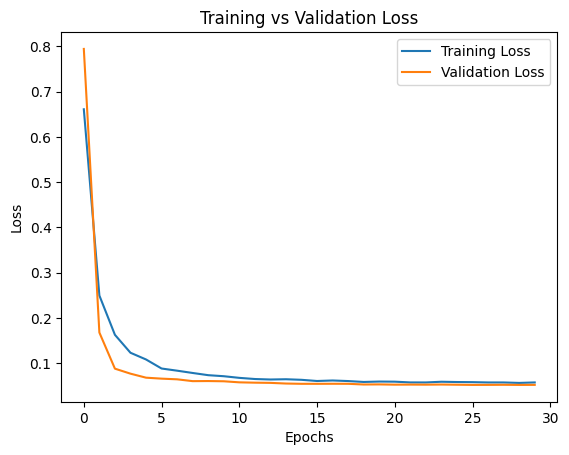

In [35]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

In [2]:



models_per_station = {}
history_per_station = {}
results_per_station = {}


for station_id, group in list(grouped):
    print(f"Training model for station {station_id}...")
    
    group = group.sort_index() 
    
    X = group.drop(columns=['available_bikes', 'available_bike_stands'])
    y = group['available_bikes']
     
   
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()
    X_scaled = scaler_X.fit_transform(X)
    y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2,shuffle=False)

    X_train = X_train.reshape((X_train.shape[0],1, X_train.shape[1]))
    
    X_test = X_test.reshape((X_test.shape[0],1, X_test.shape[1]))

    model = build_model(input_shape=(X_train.shape[1], X_train.shape[2]))
    

    callback_list = [
        callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ]
    
    history=model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, shuffle=False,callbacks=callback_list)
    

    predictions_scaled = model.predict(X_test)
    predictions = scaler_y.inverse_transform(predictions_scaled)
    y_test_original = scaler_y.inverse_transform(y_test)
    
    mse = mean_squared_error(y_test_original, predictions)
    r2 = r2_score(y_test_original, predictions)
    
    print(f"Station {station_id} - MSE: {mse:.4f}, R²: {r2:.4f}")
    

    models_per_station[station_id] = model
    history_per_station[station_id] = history
    results_per_station[station_id] = {'mse': mse, 'r2': r2}


results_df = pd.DataFrame.from_dict(results_per_station, orient='index')
print(results_df)




Training model for station 1...
Epoch 1/10
68/68 [==============================] - 4s 18ms/step - loss: 0.1661 - mae: 0.3286 - val_loss: 0.1093 - val_mae: 0.3071
Epoch 2/10
68/68 [==============================] - 1s 9ms/step - loss: 0.1054 - mae: 0.2796 - val_loss: 0.1211 - val_mae: 0.3265
Epoch 3/10
68/68 [==============================] - 1s 9ms/step - loss: 0.0948 - mae: 0.2603 - val_loss: 0.1350 - val_mae: 0.3395
Epoch 4/10
68/68 [==============================] - 1s 9ms/step - loss: 0.0904 - mae: 0.2494 - val_loss: 0.1452 - val_mae: 0.3471
Epoch 5/10
68/68 [==============================] - 1s 8ms/step - loss: 0.0879 - mae: 0.2437 - val_loss: 0.1538 - val_mae: 0.3534
Epoch 6/10
68/68 [==============================] - 1s 8ms/step - loss: 0.0857 - mae: 0.2391 - val_loss: 0.1592 - val_mae: 0.3570
Epoch 7/10
68/68 [==============================] - 0s 7ms/step - loss: 0.0834 - mae: 0.2351 - val_loss: 0.1645 - val_mae: 0.3607
Epoch 8/10
68/68 [==============================] - 1s 9m

          mse         r2
1   38.781077  -0.074210
2   69.195373   0.073549
3   33.174890  -0.043629
4   67.371469  -0.840583
5  409.335241 -36.326546
19/19 [==============================] - 0s 6ms/step


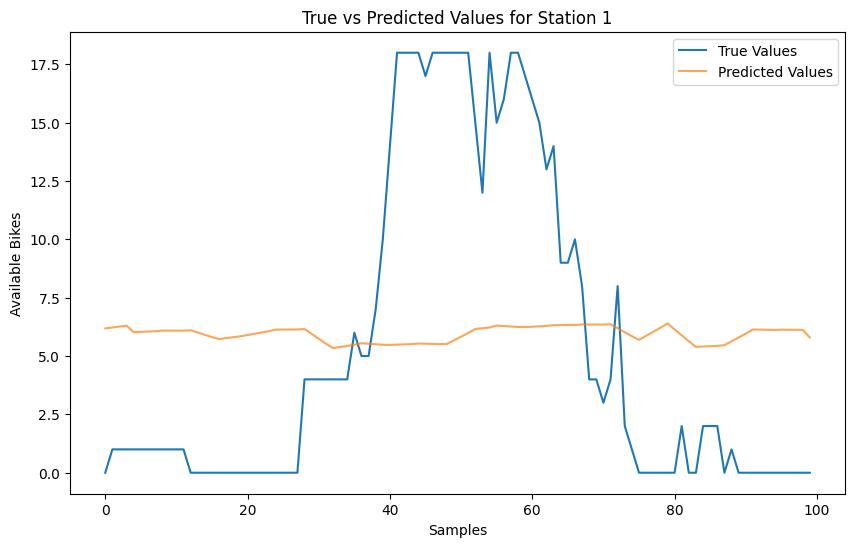

In [14]:
results_df = pd.DataFrame.from_dict(results_per_station, orient='index')
print(results_df)

station_to_plot = list(results_per_station.keys())[0]  
model_to_plot = models_per_station[station_to_plot]
group_to_plot = grouped.get_group(station_to_plot).sort_index()

X_test_to_plot = group_to_plot.iloc[int(len(group_to_plot) * 0.8):].drop(columns=['available_bikes', 'available_bike_stands']).values
X_test_to_plot = X_test_to_plot.reshape(X_test_to_plot.shape[0], 1, X_test_to_plot.shape[1])
y_test_to_plot = group_to_plot['available_bikes'].iloc[int(len(group_to_plot) * 0.8):].values

predictions_to_plot = model_to_plot.predict(X_test_to_plot)

plt.figure(figsize=(10, 6))
plt.plot(y_test_to_plot[:100], label='True Values')  # 前 100 个样本
plt.plot(predictions_to_plot[:100], label='Predicted Values', alpha=0.7)
plt.xlabel('Samples')
plt.ylabel('Available Bikes')
plt.legend()
plt.title(f'True vs Predicted Values for Station {station_to_plot}')
plt.show()